# Multi-Layer Perceptron


In [1]:
%matplotlib inline

from __future__ import annotations
from torchvision import datasets as D
from torchvision import transforms as T
import pathlib
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import numpy as np

## Forward Propagation


### Single example

Suppose we have $L$ layer network. For the $i$-th node in the $l$-th layer, for training example $x^{(j)}$, we have

$$
\begin{align}
z^{[l](j)}_i&={w^{[l]}_i}^{T}a^{[l-1](j)}+b^{[l]}_i \\
a^{[l](j)}_i&=g(z^{[l](j)}_i)
\end{align}
$$

Or we can combine these two equations into one.

$$
a^{[l](j)}_i = g({w^{[l]}_i}^{T}a^{[l-1](j)}+b^{[l]}_i)
$$

Here, $g$ is the activation function, $l\in[1,L],i\in[1,n^{[l]}],j\in[1,m]$, $L$ is the number of layers, $n^{[l]}$ is the number of nodes in layer $l$, $m$ is the number of training examples.

We can stack all nodes in the same layer $l$ to have a system of equations.

$$
\begin{align}
a^{[l](j)}_1 &= g({w^{[l]}_1}^{T}a^{[l-1](j)}+b^{[l]}_1) \\
a^{[l](j)}_2 &= g({w^{[l]}_2}^{T}a^{[l-1](j)}+b^{[l]}_2) \\
\vdots \\
a^{[l](j)}_i &= g({w^{[l]}_i}^{T}a^{[l-1](j)}+b^{[l]}_i) \\
\vdots \\
a^{[l](j)}_{n^{[l]}} &= g({w^{[l]}_{n^{[l]}}}^{T}a^{[l-1](j)}+b^{[l]}_{n^{[l]}})
\end{align}
$$

We can stack all activated values $a^{[l](j)}_i$ and get the system of equations below.

$$
a^{[l](j)}=g(
\begin{bmatrix}
-{w^{[l]}_1}^T-\\
-{w^{[l]}_2}^T-\\
\vdots\\
-{w^{[l]}_i}^T-\\
\vdots\\
-{w^{[l]}_{n^{[l]}}}^T-
\end{bmatrix}_{n^{[l]}\times n^{[l-1]}}
a^{[l-1](j)}+
\begin{bmatrix}
b^{[l]}_1 \\
b^{[l]}_2 \\
\vdots \\
b^{[l]}_i \\
\vdots \\
b^{[l]}_{n^{[l]}} \\
\end{bmatrix}_{n^{[l]}\times 1}
)
$$

For classification problem, we use $softmax$ function to convert the result from the output layer into valid probability distribution.

$$
\hat{y}^{(j)}=
\frac{1}{\sum_{k=1}^{n^{L}}e^{a^{[L]}}_k}
\begin{bmatrix}
e^{a^{[L]}}_1\\
e^{a^{[L]}}_2\\
\vdots\\
e^{a^{[L]}}_i\\
\vdots\\
e^{a^{[L]}}_{n^{[L]}}
\end{bmatrix}
$$

Finally we can compute the cross-entropy loss $\mathcal{L}$ for one example.

$$
\mathcal{L}(\hat{y}^{(j)},y^{(j)})=-\frac{1}{n^{[l]}}\sum_{i=1}^{n^{[l]}}y_i^{(j)}\ \mathrm{ln}(\hat{y}_i^{(j)})
$$


### Multiple examples

We can stack the training examples in to one matrix like below.

$$
A^{[0]}=X=
\begin{bmatrix}
| & | & & | \\
x^{(1)} & x^{(2)} & \dots & x^{(m)} \\
| & | & & | \\
\end{bmatrix}
$$

For every layer $l$,

$$
\begin{align}
Z^{[l]}_{n^{[l]}\times m}&=W^{[l]}_{n^{[l]}\times n}A^{[l-1]}_{n^{[l-1]}\times m}+b^{[l]}_{n^{[l]}\times m} \\
A^{[l]}&=\sigma (Z^{[l]}).
\end{align}
$$

Similarly, we have the MSE (Mean Squared Error)for for all examples.

$$
\mathrm{L}(\hat{y}, y)=\frac{1}{n^{[L]}}\sum_{j=1}^{n^{[L]}}\mathcal{L}(\hat{y}^{(j)},y^{(j)})
$$


## Backward Propagation


## Single Example

#### Forward Pass

For any arbitrary node from sample $(j)$ in layer $[l]$ we have both $z^{[l](j)}$ and $a^{[l](j)}$. Since we know that from the previous section, that

$$
z_i^{[l](j)}=\sum_{p=1}^{n^{[l-1]}}w_{ip}^{[l]}a_p^{[l](j)}+b_i^{[l]}.
$$

It's obvious that $\frac{\partial z_i^{[l](j)}}{\partial w_{ip}^{[l](j)}}=a_p^{[l][j]},\ p\in[1,n^{[l-1]}]$. In the backward propagation, there is actually a "forward pass" inside.

#### Backward Pass

Since we can compute $\frac{\partial z_i^{[l](j)}}{\partial w_{ip}^{[l](j)}}$ already, then the question is that how can we compute $\frac{\partial \mathrm{L}}{\partial z_i^{[l](j)}}$.

We can also easily compute

$$
\frac{\partial a_i^{[l](j)}}{\partial z_i^{[l](j)}}=g'(z_i^{[l](j)}).
$$

Then we have,

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial z_i^{[l](j)}}
    &=\frac{\partial \mathcal{L}}{\partial a_i^{[l](j)}}\frac{\partial a_i^{[l](j)}}{\partial z_i^{[l](j)}}\\
    &=\frac{\partial \mathcal{L}}{\partial a_i^{[l](j)}}g'(z_i^{[l](j)})\\
    &=[\sum_{k=1}^{n^{[l+1]}}\frac{\partial \mathcal{L}}{\partial z_k^{[l+1](j)}}\frac{\partial z_k^{[l+1](j)}}{\partial a_i^{[l](j)}}]g'(z_i^{[l](j)})\\
    &=[\sum_{k=1}^{n^{[l+1]}}\frac{\partial \mathcal{L}}{\partial z_k^{[l+1](j)}}w_{ki}^{[l+1]}]g'(z_i^{[l](j)})\\
    &={W_{\_i}^{[l+1]}}^{T} \frac{\partial \mathcal{L}}{\partial z^{[l+1](j)}} g'(z_i^{[l](j)})\\
\end{align}
$$

Here $W_{\_i}$ is the $i$-th column of the matrix. We observe that there is a recursion appearing.

We can let $\delta_i^{[l](j)}=\frac{\partial \mathcal{L}}{\partial z_i^{[l](j)}}$ then we have,

$$
\delta_i^{[l](j)}={W_{\_i}^{[l+1]}}^{T}\delta^{[l+1](j)}g'(z_i^{[l](j)})\\
$$

#### Putting It Together

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_{ip}^{[l]}}
    &=\frac{\partial \mathcal{L}}{\partial z_i^{[l+1](j)}}\frac{\partial z_i^{[l+1](j)}}{\partial w_{ip}^{[l](j)}}\\
    &=[\sum_{k=1}^{n^{[l+1]}}[\frac{\partial \mathcal{L}}{\partial z_k^{[l+1](j)}}w_{ki}^{[l+1]}]g'(z_i^{[l](j)})]a_{p}^{[l]}\\
\frac{\partial \mathcal{L}}{\partial b_{i}^{[l]}}
    &=\frac{\partial \mathcal{L}}{\partial z_i^{[l](j)}}\frac{\partial z_i^{[l+1](j)}}{\partial w_{ip}^{[l](j)}}\\
    &=\sum_{k=1}^{n^{[l+1]}}[\frac{\partial \mathcal{L}}{\partial z_k^{[l+1](j)}}w_{ki}^{[l+1]}]g'(z_i^{[l](j)}).
\end{align}
$$

We can also vectorize it.

$$
\begin{align}
\nabla_{W^{[l]}}\mathrm{L}
    &=
    \begin{bmatrix}
    \frac{\partial \mathrm{L}}{\partial z_1^{[l](j)}}\frac{\partial z_1^{[l](j)}}{\partial w_{11}^{[l](j)}} &
    \frac{\partial \mathrm{L}}{\partial z_1^{[l](j)}}\frac{\partial z_1^{[l](j)}}{\partial w_{12}^{[l](j)}} &
    \dots &
    \frac{\partial \mathrm{L}}{\partial z_1^{[l](j)}}\frac{\partial z_1^{[l](j)}}{\partial w_{1\times n^{[l]}}^{[l](j)}} \\

    \frac{\partial \mathrm{L}}{\partial z_2^{[l](j)}}\frac{\partial z_2^{[l](j)}}{\partial w_{21}^{[l](j)}} &
    \frac{\partial \mathrm{L}}{\partial z_2^{[l](j)}}\frac{\partial z_2^{[l](j)}}{\partial w_{22}^{[l](j)}} &
    \dots &
    \frac{\partial \mathrm{L}}{\partial z_2^{[l](j)}}\frac{\partial z_2^{[l](j)}}{\partial w_{2\times n^{[l]}}^{[l](j)}} \\

    \vdots & \vdots & \ddots & \vdots \\

    \frac{\partial \mathrm{L}}{\partial z_{n^{[l]}}^{[l](j)}}\frac{\partial z_{n^{[l]}}^{[l](j)}}{\partial w_{n^{[l]}\times 1}^{[l](j)}} &
    \frac{\partial \mathrm{L}}{\partial z_{n^{[l]}}^{[l](j)}}\frac{\partial z_{n^{[l]}}^{[l](j)}}{\partial w_{n^{[l]}\times 2}^{[l](j)}} &
    \dots &
    \frac{\partial \mathrm{L}}{\partial z_{n^{[l]}}^{[l](j)}}\frac{\partial z_{n^{[l]}}^{[l](j)}}{\partial w_{n^{[l]}\times n^{[l-1]}}^{[l](j)}} \\

    \end{bmatrix}, \frac{\partial \mathrm{L}}{\partial w_{ip}^{[l]}}=[\sum_{k=1}^{n^{[l+1]}}[\frac{\partial \mathrm{L}}{\partial z_k^{[l+1](j)}}w_{ki}^{[l+1]}]g'(z_i^{[l](j)})]a_{p}^{[l]},p\in[1,n^{[l-1]}],i\in[1,n^{[l]}]\\
    &=
    \nabla_{z^{[l+1](j)}}\mathcal{L}\ {a^{[l](j)}}^T
\end{align}
$$

### Multiple Example

$$
\begin{align}

\nabla_{Z^{[l]}}\mathcal{L}&={W^{[l+1]}}^T\nabla_{Z^{[l+1]}}\mathcal{L}\odot g'(Z^{[l]})\\
\nabla_{W^{[l]}}\mathcal{L}&=\frac{1}{m}\nabla_{Z^{l]}}\mathcal{L} {A^{[l-1]}}^T \\
\nabla_{b^{[l]}}\mathcal{L}&=\frac{1}{m}\nabla_{Z^{[l]}}\mathcal{L}
    \begin{bmatrix}
        1 \\
        \vdots \\
        1
    \end{bmatrix}\Biggr\}m

\end{align}
$$

Because of the transpose, the resulting dimension is $n^{[l]}\times m$ and $m\times n^{[l-1]}$ and $\nabla_{W^{[l]}}\mathrm{L}$ is still $n^{[l]}\times n^{[l-1]}$.


## Gradient Descent for Neural Networks


Gradient descent works on every batch of the input data.

$$
\begin{align}
W^{[l]}&:=W^{[l]}-\eta\nabla_{W^{[l]}}\mathcal{L}(\hat{y}-y) \\
b^{[l]}&:=b^{[l]}-\eta\nabla_{b^{[l]}}\mathcal{L}(\hat{y}-y)
\end{align}
$$


## MNIST


For the MNIST dataset, we will use a network with two hidden layers.

$$
n^{[0]}=28\times 28=784,n^{[1]}=128,n^{[2]}=64,n^{[3]}=10
$$

Cross-entropy function.

$$
\begin{align}
\mathcal{L}(\hat{\bold{Y}},\bold{Y})&=-\frac{1}{m}\sum_{k=1}^{m}\sum_{j=1}^{n^{[3]}}\bold{y}_{j}^{(k)}\mathrm{ln}(\hat{\bold{y}}_{j}^{(k)}) \\
\frac{\partial \mathcal{L}}{\partial \hat{\bold{y}}_{j}^{(k)}}&=-\frac{1}{m}\cdot\frac{\bold{y}_{j}^{(k)}}{\hat{\bold{y}}_{j}^{(k)}} \\
\end{align}
$$


$softmax$ function.

$$
\begin{align}
\bold{a}^{[3](k)}
    &= softmax(\bold{z}^{[3](k)}) \\
    &= \frac{e^{\bold{z}^{[3](k)}}}{\sum_{i=1}^{n^{[3]}}e^{\bold{z}_i^{[3](k)}}} \\
    &= \frac{e^{\bold{z}^{[3](k)}}}{h} \\
\frac{\partial \bold{\hat{y}}^{(k)}}{\partial \bold{a}^{[3](k)}}
    &= \frac{e^{\bold{z}^{[3](k)}}h-e^{2\bold{z}^{[3](k)}}}{h^2}\\
\end{align}
$$

Back-propagation for layer ${[3]}$.

$$
\begin{align}
\frac{\partial\mathcal{L}}{\partial \bold{a}^{[3](k)}}
&=\frac{\partial\mathcal{L}}{\partial\hat{\bold{y}}^{(k)}}\frac{\partial \bold{\hat{y}}^{(k)}}{\partial \bold{a}^{[3](k)}}\\

\frac{\partial\mathcal{L}}{\partial \bold{z}^{[3](k)}}
&=\frac{\partial\mathcal{L}}{\partial \bold{a}^{[3](k)}}g'(\bold{z}^{[3](k)})\\

\frac{\partial\mathcal{L}}{\partial W_{ij}^{[3]}}
&=\frac{\partial\mathcal{L}}{\partial \bold{z}_i^{[3](k)}}\bold{a}_j^{[2](k)}\\

\frac{\partial\mathcal{L}}{\partial W^{[3]}}
&=(\frac{\partial\mathcal{L}}{\partial \bold{z}^{[3](k)}}){\bold{a}^{[2](k)}}^T\\

\frac{\partial\mathcal{L}}{\partial \bold{b}_{i}^{[3]}}
&=\frac{\partial\mathcal{L}}{\partial \bold{z}_i^{[3](k)}}\\

\frac{\partial\mathcal{L}}{\partial \bold{b}^{[3]}}
&=\frac{\partial\mathcal{L}}{\partial \bold{z}^{[3](k)}}\\

\end{align}
$$


In [2]:
dataset = D.MNIST(
    root=pathlib.Path("/tmp/dataset"), download=True, transform=T.ToTensor()
)

training_dataset, validation_dataset, test_dataset = random_split(
    dataset, [0.7, 0.2, 0.1]
)
print("training:  ", len(training_dataset))
print("validation:", len(validation_dataset))

training_loader = DataLoader(training_dataset, batch_size=64, shuffle=True)

training:   42000
validation: 12000


### Visualize Sample Data


Text(0.5, 1.0, '0')

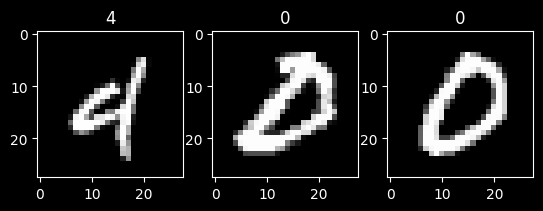

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

samples = np.random.choice(len(dataset), 3)
images = dataset.data[samples]
labels = dataset.targets[samples]

plt.subplot(131)
plt.title(int(labels[0]))
plt.imshow(images[0], cmap="gray")
plt.subplot(132)
plt.imshow(images[1], cmap="gray")
plt.title(int(labels[1]))
plt.subplot(133)
plt.imshow(images[2], cmap="gray")
plt.title(int(labels[2]))

### Model Implementation


In [4]:
from modules.mnist import MLPModel
from modules.utils import relu, one_hot, softmax, cross_entropy, tanh

### Backward Propagation Implementation


In [5]:
#
# --- Set up model
#

# Create model
mlp = MLPModel([784, 128, 64, 10], num_classes=10)
g = relu
for i in range(len(mlp.sequential.layers)):
    mlp.sequential.layers[i].g = g

# Get first sample
m = 1
image, label = training_dataset[1]
# Transform data to be trainable
X = np.asarray(image).reshape(-1, 1)
y = one_hot([label], 10)

In [6]:
#
# --- Forward propagation ---
#

y_hat = mlp(X)
loss = cross_entropy(y_hat, y)
print("loss:", loss)

loss: 49.84278055505847


### Train


In [22]:
def backpropagation(mlp, learning_rate, y_hat, y, X0):
    # Backward propagation
    layers = mlp.sequential.layers
    layer1 = layers[0]
    layer2 = layers[1]
    layer3 = layers[2]

    A1 = layer1.cache["A"]
    A2 = layer2.cache["A"]

    Z1 = layer1.cache["Z"]
    Z2 = layer2.cache["Z"]
    Z3 = layer3.cache["Z"]

    d_Z3 = (
        cross_entropy.dev(y_hat, y)  # dL/dY
        * softmax.dev(y_hat)  # dY/dA3
        * g.dev(Z3)  # dA3/dZ3
        / layer3.cache["sigma"]
    )

    d_W3 = 1 / m * d_Z3 @ A2.T
    d_b3 = 1 / m * np.sum(d_Z3, axis=1, keepdims=1)

    d_Z2 = layer3.W.T @ d_Z3 * g.dev(Z2) / layer2.cache["sigma"]

    d_W2 = 1 / m * d_Z2 @ A1.T
    d_b2 = 1 / m * np.sum(d_Z2, axis=1, keepdims=1)

    d_Z1 = layer2.W.T @ d_Z2 * g.dev(Z1) / layer1.cache["sigma"]

    d_W1 = 1 / m * d_Z1 @ X0.T
    d_b1 = 1 / m * np.sum(d_Z1, axis=1, keepdims=1)

    mlp.sequential.layers[0].W -= learning_rate * d_W1
    mlp.sequential.layers[1].W -= learning_rate * d_W2
    mlp.sequential.layers[2].W -= learning_rate * d_W3

    mlp.sequential.layers[0].b -= learning_rate * d_b1
    mlp.sequential.layers[1].b -= learning_rate * d_b2
    mlp.sequential.layers[2].b -= learning_rate * d_b3
    return mlp

In [54]:
mlp = MLPModel([784, 128, 64, 10], num_classes=10)
g = relu
print(mlp.sequential.layers[0].W)
for i in range(len(mlp.sequential.layers)):
    mlp.sequential.layers[i].g = g

y_hat = mlp(X)
mlp = backpropagation(mlp, 0.001, y_hat, y, X)

[[-1.47855019 -0.37634103  0.65668372 ...  0.14169194 -0.4734928
   0.70909664]
 [-1.14585023  1.84501246  0.19350625 ... -0.27626953  0.77626251
   0.95285611]
 [ 1.01013746 -1.54307894 -0.60210779 ...  0.19118499  0.21881675
  -0.80104442]
 ...
 [ 0.29174234  0.06672859  0.54843997 ... -0.69393808  0.01015568
   1.48331388]
 [-1.63744866  0.17888241  0.26817919 ...  0.08209038  0.00514709
  -0.7352581 ]
 [ 0.41890435 -0.00353325  2.27324453 ... -1.29854899 -0.9344092
  -1.79356828]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
learning_rate = 0.001
num_epochs = 1
mlp = MLPModel([784, 64, 32, 10], num_classes=10)

# Set up activation function
g = relu
for i in range(len(mlp.sequential.layers)):
    mlp.sequential.layers[i].g = g

layers = mlp.sequential.layers
m = training_loader.batch_size

for i in range(num_epochs):
    running_loss = 0.0
    for batch, (image, label) in enumerate(training_loader):
        X0 = image.numpy().reshape(784, len(label))
        y = one_hot(label, 10)
        # Forward propagation
        y_hat = mlp(X0)
        loss = cross_entropy(y_hat=y_hat, y=y)
        running_loss += loss

        mlp = backpropagation(mlp, learning_rate, y_hat, y, X0)

        if batch % 100 == 0:
            print(f"epoch: {i}, batch: {batch:4d}, loss={loss:10.7f}")

    print(f"loss={running_loss:7.3f}")

## Appendix: Activation Functions

### Sigmoid

$$
\begin{align}
g(z)&=\frac{1}{1+e^{-z}}\\
g'(z)&=g(z)(1-g(z))=a(1-a)
\end{align}
$$

### $tanh$

$$
\begin{align}
g(z)&=\mathrm{tanh}(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}\\
g'(z)&=1-\mathrm{tanh}^2(z)

\end{align}
$$

### ReLU

$$
\begin{align}
g(z)&=\mathrm{max}(0,z)\\
g'(z)&=
\begin{cases}
0&if\ z<0\\
1&if\ z>0\\
undefined&if\ z=0
\end{cases}
\end{align}
$$

### Leaky ReLU

$$
\begin{align}
g(z)&=\mathrm{max}(0.01z,z)\\
g'(z)&=
\begin{cases}
0.01&if\ z<0\\
1&if\ z\geq0
\end{cases}
\end{align}
$$

### Softmax

$$
\begin{align}

h(x)&=\sum_{k=1}^{N}e^{x_k} \\
f(x_j)&= \frac{e^{x_j}}{h(x)} \\
\frac{\partial f(x_j)}{\partial x_j}&=\frac{e^{x_j}h(x)-e^{2x_j}}{h^2(x)}

\end{align}
$$

### MSE Loss (L2-norm)

$$
\begin{align}
\mathcal{L}(\hat{y}, y)&=\frac{1}{2}\sum_{k=1}^{N}||\hat{y}-y||^2_2 \\
\frac{\partial\mathcal{L}(\hat{y},y)}{\partial \hat{y}}&=\hat{y}-y
\end{align}
$$

### Cross-Entropy Loss

$$
\mathcal{L}(\hat{y}^{(j)},y^{(j)})=-\frac{1}{N}\sum_{i=1}^{N}y_i\ \mathrm{log}(\hat{y}_i),\ where \sum y_i=1\ and\ \sum\hat{y_i}=1.
$$
